In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

cd C:\Users\devraj.gurjar\Downloads

C:\Users\devraj.gurjar\Downloads


In [3]:
user_activity = pd.read_csv("Dataset//User_activity.txt", index_col=[0])

In [4]:
user_activity

,0,1,2,3,4,5,6,7,8,9,...,22438,22439,22440,22441,22442,22443,22444,22445,22446,22447
device_id,B-52-23845,B-52-16587,B-52-36461,B-52-29089,B-52-14212,B-52-30970,B-52-15903,B-52-12407,B-52-22743,B-52-18658,...,B-52-16131,B-52-50027,B-52-23845,B-52-16587,B-52-36461,B-52-29089,B-52-13395,B-52-8702,B-52-50977,B-52-48431
app_name,Snapchat (Mobile App),Pinterest (Mobile App),Facebook (Mobile App),Yahoo Mail (Mobile App),Netflix (Mobile App),Instagram (Mobile App),Yahoo Newsroom (Mobile App),Google Search (Mobile App),YouTube (Mobile App),YouTube (Mobile App),...,Google Search (Mobile App),Facebook Messenger (Mobile App),Snapchat (Mobile App),Pinterest (Mobile App),Facebook (Mobile App),Yahoo Mail (Mobile App),Netflix (Mobile App),GroupMe (Mobile App),Instagram (Mobile App),YouTube (Mobile App)
minutes,27.9342,14.6664,439.7652,900.6606,17.3502,16.065,42.6006,90.1152,NaN,61.803000000000004,...,1.89,464.8644,27.9342,14.6664,439.7652,900.6606,1.1340000000000001,343.5264,0.9072,994.6692


# Transformation 1:
1. Before performing joins, check for duplicates in data in each data source and clean
them individually.
2. Check for duplicates in joined dataset (if any)
3. Sort the data based on columns – “app_name” and “minutes”.
(Sorting priority: app_name – 1 and minutes – 2)

In [5]:
user_activity= user_activity.T

In [6]:
user_activity

,device_id,app_name,minutes
0,B-52-23845,Snapchat (Mobile App),27.9342
1,B-52-16587,Pinterest (Mobile App),14.6664
2,B-52-36461,Facebook (Mobile App),439.7652
3,B-52-29089,Yahoo Mail (Mobile App),900.6606
4,B-52-14212,Netflix (Mobile App),17.3502
...,...,...,...
22443,B-52-29089,Yahoo Mail (Mobile App),900.6606
22444,B-52-13395,Netflix (Mobile App),1.1340000000000001
22445,B-52-8702,GroupMe (Mobile App),343.5264
22446,B-52-50977,Instagram (Mobile App),0.9072


In [7]:
user_activity.isnull().sum()

device_id      0
app_name       0
minutes      748
dtype: int64

In [8]:
user_activity.dtypes

device_id    object
app_name     object
minutes      object
dtype: object

In [9]:
user_activity[user_activity.duplicated()==True]

,device_id,app_name,minutes
22440,B-52-23845,Snapchat (Mobile App),27.9342
22441,B-52-16587,Pinterest (Mobile App),14.6664
22442,B-52-36461,Facebook (Mobile App),439.7652
22443,B-52-29089,Yahoo Mail (Mobile App),900.6606
22444,B-52-13395,Netflix (Mobile App),1.1340000000000001
22445,B-52-8702,GroupMe (Mobile App),343.5264
22446,B-52-50977,Instagram (Mobile App),0.9072
22447,B-52-48431,YouTube (Mobile App),994.6692


In [10]:
user_activity = user_activity.drop_duplicates()

In [11]:
user_activity.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22435    False
22436    False
22437    False
22438    False
22439    False
Length: 22440, dtype: bool

In [12]:
user_activity['device_id'].isnull().sum()

0

In [13]:
device_demo = pd.read_csv(r"Dataset\device_demographics.csv")

In [14]:
device_demo

,device_id,gender_id
0,B-52-23845,2.0
1,B-52-16587,1.0
2,B-52-36461,2.0
3,B-52-29089,2.0
4,B-52-14212,2.0
...,...,...
2769,B-52-44080,2.0
2770,B-52-10032,2.0
2771,B-52-44099,2.0
2772,B-52-1368,2.0


In [15]:
device_demo.duplicated(subset='device_id')

0       False
1       False
2       False
3       False
4       False
        ...  
2769    False
2770    False
2771    False
2772    False
2773    False
Length: 2774, dtype: bool

In [16]:
device_demo['device_id'].isnull().sum()

0

In [17]:
publishers = pd.read_csv("Dataset/publishers.csv")

In [18]:
publishers

,app_name,Publisher
0,Walmart (Mobile App),Wal-Mart
1,Microsoft Word (Mobile App),Microsoft Sites
2,Sam's Club Scan & Go (Mobile App),Wal-Mart
3,Pinterest (Mobile App),Pinterest
4,YouTube (Mobile App),Google Sites
5,Netflix (Mobile App),Netflix Inc.
6,Tumblr (Mobile App),Oath
7,Facebook Messenger (Mobile App),Facebook
8,Kindle (Mobile App),Amazon Sites
9,GroupMe (Mobile App),Microsoft Sites


In [19]:
publishers.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21     True
22     True
dtype: bool

In [20]:
publishers = publishers.drop_duplicates()
publishers

,app_name,Publisher
0,Walmart (Mobile App),Wal-Mart
1,Microsoft Word (Mobile App),Microsoft Sites
2,Sam's Club Scan & Go (Mobile App),Wal-Mart
3,Pinterest (Mobile App),Pinterest
4,YouTube (Mobile App),Google Sites
5,Netflix (Mobile App),Netflix Inc.
6,Tumblr (Mobile App),Oath
7,Facebook Messenger (Mobile App),Facebook
8,Kindle (Mobile App),Amazon Sites
9,GroupMe (Mobile App),Microsoft Sites


In [21]:
publishers.isnull().sum()

app_name     0
Publisher    0
dtype: int64

# merge dataset (user_activity, publishers)

In [22]:
res = pd.merge(user_activity, publishers, on='app_name')

In [23]:
res

,device_id,app_name,minutes,Publisher
0,B-52-23845,Snapchat (Mobile App),27.9342,"Snapchat, Inc"
1,B-52-6821,Snapchat (Mobile App),17.199,"Snapchat, Inc"
2,B-52-21945,Snapchat (Mobile App),181.7046,"Snapchat, Inc"
3,B-52-24149,Snapchat (Mobile App),133.3962,"Snapchat, Inc"
4,B-52-28462,Snapchat (Mobile App),1252.7676,"Snapchat, Inc"
...,...,...,...,...
22435,B-52-38133,Sam's Club (Mobile App),25.9308,Wal-Mart
22436,B-52-47671,Sam's Club (Mobile App),149.121,Wal-Mart
22437,B-52-35758,Sam's Club (Mobile App),2.2680000000000002,Wal-Mart
22438,B-52-6821,Sam's Club (Mobile App),11.1132,Wal-Mart


In [24]:
res.duplicated().sum()

0

In [25]:
res.isnull().sum()

device_id      0
app_name       0
minutes      748
Publisher      0
dtype: int64

# merge dataset (res, device_demo)

In [26]:
res = pd.merge(res, device_demo, on='device_id')
res

,device_id,app_name,minutes,Publisher,gender_id
0,B-52-23845,Snapchat (Mobile App),27.9342,"Snapchat, Inc",2.0
1,B-52-23845,Pinterest (Mobile App),5.5188,Pinterest,2.0
2,B-52-23845,Instagram (Mobile App),867.132,Facebook,2.0
3,B-52-23845,Google Search (Mobile App),236.817,Google Sites,2.0
4,B-52-23845,YouTube (Mobile App),69.6276,Google Sites,2.0
...,...,...,...,...,...
22435,B-52-44289,Google Play (Mobile App),0.9072,Google Sites,2.0
22436,B-52-44080,Google Play (Mobile App),2097.8244,Google Sites,2.0
22437,B-52-44099,Google Play (Mobile App),1256.472,Google Sites,2.0
22438,B-52-1368,Google Play (Mobile App),31.9032,Google Sites,2.0


In [27]:
res.duplicated().sum()

0

In [28]:
res.sample(12)

,device_id,app_name,minutes,Publisher,gender_id
19128,B-52-30875,Facebook Messenger (Mobile App),639.7272,Facebook,2.0
13245,B-52-41781,Instagram (Mobile App),74.8062,Facebook,2.0
1896,B-52-24301,Google Search (Mobile App),140.3514,Google Sites,2.0
16555,B-52-45448,Facebook Messenger (Mobile App),1112.5674,Facebook,1.0
17492,B-52-51167,Google Search (Mobile App),608.769,Google Sites,2.0
9606,B-52-39672,Amazon Mobile (Mobile App),NaN,Amazon Sites,1.0
7219,B-52-19665,YouTube (Mobile App),579.7008,Google Sites,1.0
15577,B-52-21888,Kindle (Mobile App),112.5684,Amazon Sites,2.0
1364,B-52-38095,Walmart (Mobile App),208.6182,Wal-Mart,2.0
6712,B-52-48298,Amazon Mobile (Mobile App),1.7009999999999998,Amazon Sites,1.0


In [29]:
res.isnull().sum()

device_id      0
app_name       0
minutes      748
Publisher      0
gender_id    795
dtype: int64

In [30]:
final_output_col_list = ['device_id','gender_id', 'app_name', 'minutes','Publisher']
res = res[final_output_col_list]
res

,device_id,gender_id,app_name,minutes,Publisher
0,B-52-23845,2.0,Snapchat (Mobile App),27.9342,"Snapchat, Inc"
1,B-52-23845,2.0,Pinterest (Mobile App),5.5188,Pinterest
2,B-52-23845,2.0,Instagram (Mobile App),867.132,Facebook
3,B-52-23845,2.0,Google Search (Mobile App),236.817,Google Sites
4,B-52-23845,2.0,YouTube (Mobile App),69.6276,Google Sites
...,...,...,...,...,...
22435,B-52-44289,2.0,Google Play (Mobile App),0.9072,Google Sites
22436,B-52-44080,2.0,Google Play (Mobile App),2097.8244,Google Sites
22437,B-52-44099,2.0,Google Play (Mobile App),1256.472,Google Sites
22438,B-52-1368,2.0,Google Play (Mobile App),31.9032,Google Sites


In [31]:
res.dtypes

device_id     object
gender_id    float64
app_name      object
minutes       object
Publisher     object
dtype: object

In [32]:
convert_dict = {
                'minutes': float
               }
res = res.astype(convert_dict)

In [33]:
res.dtypes

device_id     object
gender_id    float64
app_name      object
minutes      float64
Publisher     object
dtype: object

In [34]:
res_sort = res.sort_values(by= ['app_name', 'minutes']).reset_index(drop=True)
res_sort

,device_id,gender_id,app_name,minutes,Publisher
0,B-52-52155,2.0,Amazon Mobile (Mobile App),0.0378,Amazon Sites
1,B-52-38817,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites
2,B-52-9082,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites
3,B-52-20729,1.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites
4,B-52-41002,1.0,Amazon Mobile (Mobile App),0.1134,Amazon Sites
...,...,...,...,...,...
22435,B-52-50977,1.0,YouTube (Mobile App),NaN,Google Sites
22436,B-52-25555,2.0,YouTube (Mobile App),NaN,Google Sites
22437,B-52-7619,2.0,YouTube (Mobile App),NaN,Google Sites
22438,B-52-49609,NaN,YouTube (Mobile App),NaN,Google Sites


# Transformation 2: Step5
 Create an intermediate file (lookup file) using group by on column 'app_name' and
'Publisher' take the mode across gender id. E.g.

In [35]:
lookupfile1 = res_sort.groupby(['app_name', 'Publisher'])['gender_id'].agg(pd.Series.mode)
lookupfile1

app_name                                    Publisher      
Amazon Mobile (Mobile App)                  Amazon Sites       2.0
Amazon Music with Prime Music (Mobile App)  Amazon Sites       2.0
Facebook (Mobile App)                       Facebook           2.0
Facebook Messenger (Mobile App)             Facebook           2.0
Google Play (Mobile App)                    Google Sites       2.0
Google Search (Mobile App)                  Google Sites       2.0
GroupMe (Mobile App)                        Microsoft Sites    2.0
Instagram (Mobile App)                      Facebook           2.0
Kindle (Mobile App)                         Amazon Sites       2.0
Microsoft Word (Mobile App)                 Microsoft Sites    2.0
Netflix (Mobile App)                        Netflix Inc.       2.0
Outlook (Mobile App)                        Microsoft Sites    2.0
Pinterest (Mobile App)                      Pinterest          2.0
Sam's Club (Mobile App)                     Wal-Mart           2.0
Sa

In [36]:
res.dtypes

device_id     object
gender_id    float64
app_name      object
minutes      float64
Publisher     object
dtype: object

# For any NaN values in the gender_id column, replace missing values using the table created from step 5.

In [37]:
appName = []
for i in range(0,21):
    appName.append(lookupfile1.index[i][0])
print(appName)

for name in appName:
    print('Updating Gender Value :- ', lookupfile1[name][0],' For AppName :- ', name)
    res.loc[(res.isnull().any(axis=1)) & (res['app_name']==name), 'gender_id'] = lookupfile1[name][0]

['Amazon Mobile (Mobile App)', 'Amazon Music with Prime Music (Mobile App)', 'Facebook (Mobile App)', 'Facebook Messenger (Mobile App)', 'Google Play (Mobile App)', 'Google Search (Mobile App)', 'GroupMe (Mobile App)', 'Instagram (Mobile App)', 'Kindle (Mobile App)', 'Microsoft Word (Mobile App)', 'Netflix (Mobile App)', 'Outlook (Mobile App)', 'Pinterest (Mobile App)', "Sam's Club (Mobile App)", "Sam's Club Scan & Go (Mobile App)", 'Snapchat (Mobile App)', 'Tumblr (Mobile App)', 'Walmart (Mobile App)', 'Yahoo Mail (Mobile App)', 'Yahoo Newsroom (Mobile App)', 'YouTube (Mobile App)']
Updating Gender Value :-  2.0  For AppName :-  Amazon Mobile (Mobile App)
Updating Gender Value :-  2.0  For AppName :-  Amazon Music with Prime Music (Mobile App)
Updating Gender Value :-  2.0  For AppName :-  Facebook (Mobile App)
Updating Gender Value :-  2.0  For AppName :-  Facebook Messenger (Mobile App)
Updating Gender Value :-  2.0  For AppName :-  Google Play (Mobile App)
Updating Gender Value :- 

In [38]:
res.isnull().sum()

device_id      0
gender_id      0
app_name       0
minutes      748
Publisher      0
dtype: int64

# Transformation 3:  Step 7
Create another intermediate file (lookup file) using group by on column 'app_name'
and 'Publisher' take the median across minutes column id. E.g.

In [39]:
lookupfile2 = res_sort.groupby(['app_name', 'Publisher'])['minutes'].agg(pd.Series.median)

In [40]:
lookupfile2

app_name                                    Publisher      
Amazon Mobile (Mobile App)                  Amazon Sites         47.1555
Amazon Music with Prime Music (Mobile App)  Amazon Sites         34.3980
Facebook (Mobile App)                       Facebook           2764.6542
Facebook Messenger (Mobile App)             Facebook           1349.6490
Google Play (Mobile App)                    Google Sites         57.6639
Google Search (Mobile App)                  Google Sites        119.8638
GroupMe (Mobile App)                        Microsoft Sites      64.6758
Instagram (Mobile App)                      Facebook            247.2498
Kindle (Mobile App)                         Amazon Sites         25.4394
Microsoft Word (Mobile App)                 Microsoft Sites      11.6046
Netflix (Mobile App)                        Netflix Inc.         79.4934
Outlook (Mobile App)                        Microsoft Sites     103.2696
Pinterest (Mobile App)                      Pinterest           

# For any NaN values in the minute’s column, replace missing values using the table created from step 7.

In [41]:
appName = []
for i in range(0,21):
    appName.append(lookupfile2.index[i][0])
print(appName)

for name in appName:
    print('Updating Minutes Value :- ', lookupfile2[name][0],' For AppName :- ', name)
    res.loc[(res.isnull().any(axis=1)) & (res['app_name']==name), 'minutes'] = lookupfile2[name][0]

['Amazon Mobile (Mobile App)', 'Amazon Music with Prime Music (Mobile App)', 'Facebook (Mobile App)', 'Facebook Messenger (Mobile App)', 'Google Play (Mobile App)', 'Google Search (Mobile App)', 'GroupMe (Mobile App)', 'Instagram (Mobile App)', 'Kindle (Mobile App)', 'Microsoft Word (Mobile App)', 'Netflix (Mobile App)', 'Outlook (Mobile App)', 'Pinterest (Mobile App)', "Sam's Club (Mobile App)", "Sam's Club Scan & Go (Mobile App)", 'Snapchat (Mobile App)', 'Tumblr (Mobile App)', 'Walmart (Mobile App)', 'Yahoo Mail (Mobile App)', 'Yahoo Newsroom (Mobile App)', 'YouTube (Mobile App)']
Updating Minutes Value :-  47.1555  For AppName :-  Amazon Mobile (Mobile App)
Updating Minutes Value :-  34.398  For AppName :-  Amazon Music with Prime Music (Mobile App)
Updating Minutes Value :-  2764.6542  For AppName :-  Facebook (Mobile App)
Updating Minutes Value :-  1349.649  For AppName :-  Facebook Messenger (Mobile App)
Updating Minutes Value :-  57.6639  For AppName :-  Google Play (Mobile App

In [42]:
res.isnull().sum()

device_id    0
gender_id    0
app_name     0
minutes      0
Publisher    0
dtype: int64

In [43]:
trans4_median = res.groupby(['app_name', 'Publisher'])['minutes'].agg(pd.Series.median)
trans4_median

app_name                                    Publisher      
Amazon Mobile (Mobile App)                  Amazon Sites         47.1555
Amazon Music with Prime Music (Mobile App)  Amazon Sites         34.3980
Facebook (Mobile App)                       Facebook           2764.6542
Facebook Messenger (Mobile App)             Facebook           1349.6490
Google Play (Mobile App)                    Google Sites         57.6639
Google Search (Mobile App)                  Google Sites        119.8638
GroupMe (Mobile App)                        Microsoft Sites      64.6758
Instagram (Mobile App)                      Facebook            247.2498
Kindle (Mobile App)                         Amazon Sites         25.4394
Microsoft Word (Mobile App)                 Microsoft Sites      11.6046
Netflix (Mobile App)                        Netflix Inc.         79.4934
Outlook (Mobile App)                        Microsoft Sites     103.2696
Pinterest (Mobile App)                      Pinterest           

In [44]:
trans4_std = res.groupby(['app_name', 'Publisher'])['minutes'].std()
trans4_std

app_name                                    Publisher      
Amazon Mobile (Mobile App)                  Amazon Sites        311.223196
Amazon Music with Prime Music (Mobile App)  Amazon Sites        449.620841
Facebook (Mobile App)                       Facebook           3248.020616
Facebook Messenger (Mobile App)             Facebook           3039.701650
Google Play (Mobile App)                    Google Sites        548.827380
Google Search (Mobile App)                  Google Sites       1910.343859
GroupMe (Mobile App)                        Microsoft Sites     276.153920
Instagram (Mobile App)                      Facebook           1480.795910
Kindle (Mobile App)                         Amazon Sites       1623.650743
Microsoft Word (Mobile App)                 Microsoft Sites      93.392425
Netflix (Mobile App)                        Netflix Inc.       2322.242635
Outlook (Mobile App)                        Microsoft Sites     523.415758
Pinterest (Mobile App)                  

In [45]:
df = res
df = df.round(2)
#print(df)
grouped=res.groupby('app_name').agg(['median','std'])['minutes']
grouped['median + std'] = grouped['median']+grouped['std']
print(grouped)
grouped

                                               median          std  \
app_name                                                             
Amazon Mobile (Mobile App)                    47.1555   311.223196   
Amazon Music with Prime Music (Mobile App)    34.3980   449.620841   
Facebook (Mobile App)                       2764.6542  3248.020616   
Facebook Messenger (Mobile App)             1349.6490  3039.701650   
Google Play (Mobile App)                      57.6639   548.827380   
Google Search (Mobile App)                   119.8638  1910.343859   
GroupMe (Mobile App)                          64.6758   276.153920   
Instagram (Mobile App)                       247.2498  1480.795910   
Kindle (Mobile App)                           25.4394  1623.650743   
Microsoft Word (Mobile App)                   11.6046    93.392425   
Netflix (Mobile App)                          79.4934  2322.242635   
Outlook (Mobile App)                         103.2696   523.415758   
Pinterest (Mobile Ap

,median,std,median + std
app_name,,,
Amazon Mobile (Mobile App),47.1555,311.223196,358.378696
Amazon Music with Prime Music (Mobile App),34.3980,449.620841,484.018841
Facebook (Mobile App),2764.6542,3248.020616,6012.674816
Facebook Messenger (Mobile App),1349.6490,3039.701650,4389.350650
Google Play (Mobile App),57.6639,548.827380,606.491280
Google Search (Mobile App),119.8638,1910.343859,2030.207659
GroupMe (Mobile App),64.6758,276.153920,340.829720
Instagram (Mobile App),247.2498,1480.795910,1728.045710
Kindle (Mobile App),25.4394,1623.650743,1649.090143


# Transformation 4:  Step 9
 Filter the data across minutes column if the value is greater than (median +
standard deviation) across app_name or minutes value id less than 30 mins
(hint: perform group by over app_name to calculate median() and std() )

In [46]:
appName = []
for i in range(0,21):
    appName.append(trans4_median.index[i][0])
print(appName)
dataset_list = []
for name in appName:
    #dataset_list.append(res.loc[(res['app_name']==name) & ((pd.to_numeric(res['minutes']) >= (trans4_median[name][0] + trans4_std[name][0])) | (pd.to_numeric(res['minutes']) <= 30)) ])
    dataset_list.append(res.loc[(res['app_name']==name) &  (res['minutes'] >= 30) &  (res['minutes'] <= (grouped['median + std'][name]+1))])

print('Dataset length :- ',len(dataset_list))

['Amazon Mobile (Mobile App)', 'Amazon Music with Prime Music (Mobile App)', 'Facebook (Mobile App)', 'Facebook Messenger (Mobile App)', 'Google Play (Mobile App)', 'Google Search (Mobile App)', 'GroupMe (Mobile App)', 'Instagram (Mobile App)', 'Kindle (Mobile App)', 'Microsoft Word (Mobile App)', 'Netflix (Mobile App)', 'Outlook (Mobile App)', 'Pinterest (Mobile App)', "Sam's Club (Mobile App)", "Sam's Club Scan & Go (Mobile App)", 'Snapchat (Mobile App)', 'Tumblr (Mobile App)', 'Walmart (Mobile App)', 'Yahoo Mail (Mobile App)', 'Yahoo Newsroom (Mobile App)', 'YouTube (Mobile App)']
Dataset length :-  21


In [47]:
res_dataset = res.loc[(res['app_name']=='To Create an empty DataSet')]

for dataset in dataset_list:
    res_dataset = pd.concat([res_dataset, dataset], ignore_index=True)

In [48]:
res_dataset

,device_id,gender_id,app_name,minutes,Publisher
0,B-52-6821,2.0,Amazon Mobile (Mobile App),164.5812,Amazon Sites
1,B-52-21945,2.0,Amazon Mobile (Mobile App),38.1024,Amazon Sites
2,B-52-28462,2.0,Amazon Mobile (Mobile App),30.9204,Amazon Sites
3,B-52-30153,1.0,Amazon Mobile (Mobile App),63.2016,Amazon Sites
4,B-52-2109,1.0,Amazon Mobile (Mobile App),49.2912,Amazon Sites
...,...,...,...,...,...
14372,B-52-18107,2.0,YouTube (Mobile App),164.0520,Google Sites
14373,B-52-13984,1.0,YouTube (Mobile App),1134.6804,Google Sites
14374,B-52-8265,2.0,YouTube (Mobile App),77.5278,Google Sites
14375,B-52-25954,1.0,YouTube (Mobile App),38.3670,Google Sites


# Transformation 5:  Step 10
 Aggregate the from output to step 9 and create a statistical dataset (as per 10.1 and
10.2) with count, min, mean, Qaurtile1 (25 percentile), median, Qaurtile2 (75
percentile), standard deviation, and max values across App_Names, and across
“app_name + gender_id”

In [49]:
# 25th Percentile
def Quartile1(x):
    return x.quantile(0.25)

# 75th Percentile
def Quartile3(x):
    return x.quantile(0.75)

dataset_to_save=res_dataset.groupby('app_name').agg(['count', 'min','mean',Quartile1,'median',Quartile3,'std','max'])['minutes']
dataset_to_save

,count,min,mean,Quartile1,median,Quartile3,std,max
app_name,,,,,,,,
Amazon Mobile (Mobile App),830,30.0888,120.082061,49.33845,86.6943,168.72030,84.828539,358.8732
Amazon Music with Prime Music (Mobile App),126,32.2812,147.709200,53.97840,98.0343,210.82950,122.798296,477.7164
Facebook (Mobile App),1910,30.6180,2421.228930,926.48745,2307.0852,3681.78615,1683.694726,5995.2312
Facebook Messenger (Mobile App),1912,30.6180,1396.553956,428.68980,1172.6883,2101.08465,1138.905491,4386.3120
Google Play (Mobile App),1844,30.0132,127.655345,53.51535,86.2407,162.72900,109.966016,601.7382
Google Search (Mobile App),1747,30.0132,345.808226,106.27470,219.7314,432.52650,365.273923,1990.3968
GroupMe (Mobile App),92,30.5424,131.112587,57.68280,102.9672,190.40805,86.115822,329.9940
Instagram (Mobile App),1092,30.0132,465.368365,111.48165,252.4473,728.84070,447.561341,1724.3226
Kindle (Mobile App),129,30.9204,344.901265,51.25680,168.3990,482.89500,397.408270,1641.2382


# Saving the Target files: Output 10.1

In [50]:
dataset_to_save.to_csv("Step10_Output1.csv")

In [51]:
dataset_to_save=res_dataset.groupby(['app_name','gender_id']).agg(['count', 'min','mean','median','std','max'])['minutes']
dataset_to_save

count      min  \
app_name                                   gender_id                   
Amazon Mobile (Mobile App)                 1.0          289  30.2022   
                                           2.0          541  30.0888   
Amazon Music with Prime Music (Mobile App) 1.0           34  33.2262   
                                           2.0           92  32.2812   
Facebook (Mobile App)                      1.0          682  34.9272   
                                           2.0         1228  30.6180   
Facebook Messenger (Mobile App)            1.0          652  30.6180   
                                           2.0         1260  30.6936   
Google Play (Mobile App)                   1.0          654  30.0132   
                                           2.0         1190  30.0132   
Google Search (Mobile App)                 1.0          603  30.0510   
                                           2.0         1144  30.0132   
GroupMe (Mobile App)                       1.0           26  34.6248   
                                           2.0           66  30.5424   
Instagram (Mobile App)                     1.0          368  30.0132   
                                           2.0          724  30.0132   
Kindle (Mobile App)                        1.0           54  30.9204   
                                           2.0           75  31.1094   
Microsoft Word (Mobile App)                1.0            9  30.6558   
                                           2.0           27  31.7142   
Netflix (Mobile App)                       1.0          146  32.3568   
                                           2.0          287  30.4290   
Outlook (Mobile App)                       1.0           62  36.4392   
                                           2.0          149  30.1266   
Pinterest (Mobile App)                     1.0          155  30.3156   
                                           2.0          379  30.3912   
Sam's Club (Mobile App)                    1.0            1  58.0986   
                                           2.0            1  42.0714   
Sam's Club Scan & Go (Mobile App)          1.0            3  36.7038   
                                           2.0            4  33.6420   
Snapchat (Mobile App)                      1.0          272  30.4668   
                                           2.0          552  30.1266   
Tumblr (Mobile App)                        1.0           56  31.6386   
                                           2.0           94  30.3156   
Walmart (Mobile App)                       1.0           85  30.8070   
                                           2.0          218  30.0510   
Yahoo Mail (Mobile App)                    1.0          134  30.4290   
                                           2.0          262  30.5046   
Yahoo Newsroom (Mobile App)                1.0           10  51.9372   
                                           2.0           35  30.0888   
YouTube (Mobile App)                       1.0          632  30.4290   
                                           2.0         1122  30.0888   

                                                             mean     median  \
app_name                                   gender_id                           
Amazon Mobile (Mobile App)                 1.0         125.950123    99.0738   
                                           2.0         116.947366    82.2906   
Amazon Music with Prime Music (Mobile App) 1.0         169.770918   134.3223   
                                           2.0         139.555957    92.9124   
Facebook (Mobile App)                      1.0        2436.750784  2160.1566   
                                           2.0        2412.608486  2393.0991   
Facebook Messenger (Mobile App)            1.0        1419.131603  1075.0320   
                                           2.0        1384.870920  1234.3968   
Google Play (Mobile App)                   1.0         131.739416    89.5860   
     

# Saving the Target File Output 10.2

In [52]:
dataset_to_save.to_csv('Step10_Output2.csv')

In [53]:
Total_min_per_App =res_dataset.groupby('app_name')['minutes'].sum()
Total_device_per_App=res_dataset.groupby('app_name')['device_id'].count()
avg_time_spend_per_device = res_dataset.groupby('app_name')['minutes'].mean()
app_names=res_dataset.groupby('app_name').groups.keys()
print(Total_min_per_App)
print(Total_device_per_App)
print(avg_time_spend_per_device)
print(app_names)

app_name
Amazon Mobile (Mobile App)                    9.966811e+04
Amazon Music with Prime Music (Mobile App)    1.861136e+04
Facebook (Mobile App)                         4.624547e+06
Facebook Messenger (Mobile App)               2.670211e+06
Google Play (Mobile App)                      2.353965e+05
Google Search (Mobile App)                    6.041270e+05
GroupMe (Mobile App)                          1.206236e+04
Instagram (Mobile App)                        5.081823e+05
Kindle (Mobile App)                           4.449226e+04
Microsoft Word (Mobile App)                   1.804761e+03
Netflix (Mobile App)                          1.982774e+05
Outlook (Mobile App)                          4.129669e+04
Pinterest (Mobile App)                        1.135810e+05
Sam's Club (Mobile App)                       1.001700e+02
Sam's Club Scan & Go (Mobile App)             2.974104e+02
Snapchat (Mobile App)                         2.975206e+05
Tumblr (Mobile App)                           8

In [54]:
df1 = pd.DataFrame()
df1.dtypes

Series([], dtype: object)

In [55]:
Total_device_per_App = pd.DataFrame(Total_device_per_App)
Total_device_per_App.reset_index(drop=True, inplace=True)
Total_min_per_App = pd.DataFrame(Total_min_per_App)
Total_min_per_App.reset_index(drop=True, inplace=True)
avg_time_spend_per_device = pd.DataFrame(avg_time_spend_per_device)
avg_time_spend_per_device.reset_index(drop=True, inplace=True)

In [56]:
df1['app_name']=app_names
df1['Total_min_per_App']=Total_min_per_App
df1['Total_device_per_App']=Total_device_per_App
df1['avg_time_spend_per_device']=avg_time_spend_per_device

# Transformation 6: Step 11
 Create a new data frame with columns as app_name, “total_minutes”, “total
devices”, “Average Minutes per Device Per App”. Use the below expression for
creating this column:
Total min per App =df.groupby('app_name')['minutes'].sum()
Total device per App=df.groupby('app_name')['device_id'].count()

In [57]:
df1

,app_name,Total_min_per_App,Total_device_per_App,avg_time_spend_per_device
0,Amazon Mobile (Mobile App),9.966811e+04,830,120.082061
1,Amazon Music with Prime Music (Mobile App),1.861136e+04,126,147.709200
2,Facebook (Mobile App),4.624547e+06,1910,2421.228930
3,Facebook Messenger (Mobile App),2.670211e+06,1912,1396.553956
4,Google Play (Mobile App),2.353965e+05,1844,127.655345
5,Google Search (Mobile App),6.041270e+05,1747,345.808226
6,GroupMe (Mobile App),1.206236e+04,92,131.112587
7,Instagram (Mobile App),5.081823e+05,1092,465.368365
8,Kindle (Mobile App),4.449226e+04,129,344.901265
9,Microsoft Word (Mobile App),1.804761e+03,36,50.132250


In [58]:
df2 = df1
df2["Rank(DurationBased)"] = df2["Total_min_per_App"].rank(ascending=False)
df2

,app_name,Total_min_per_App,Total_device_per_App,avg_time_spend_per_device,Rank(DurationBased)
0,Amazon Mobile (Mobile App),9.966811e+04,830,120.082061,10.0
1,Amazon Music with Prime Music (Mobile App),1.861136e+04,126,147.709200,16.0
2,Facebook (Mobile App),4.624547e+06,1910,2421.228930,1.0
3,Facebook Messenger (Mobile App),2.670211e+06,1912,1396.553956,2.0
4,Google Play (Mobile App),2.353965e+05,1844,127.655345,7.0
5,Google Search (Mobile App),6.041270e+05,1747,345.808226,4.0
6,GroupMe (Mobile App),1.206236e+04,92,131.112587,17.0
7,Instagram (Mobile App),5.081823e+05,1092,465.368365,5.0
8,Kindle (Mobile App),4.449226e+04,129,344.901265,13.0
9,Microsoft Word (Mobile App),1.804761e+03,36,50.132250,19.0


# Transformation 7:  Step 12
 Use data generated in step 11 to create a ranking system for Apps based on minutes
spend over the app_name and rank based on total users on different apps and load
the data into the target system (a separate file for each ranking system)

In [59]:
duration_rank =df2.sort_values(by='Rank(DurationBased)')
duration_rank.reset_index(drop=True, inplace=True)
duration_rank

,app_name,Total_min_per_App,Total_device_per_App,avg_time_spend_per_device,Rank(DurationBased)
0,Facebook (Mobile App),4.624547e+06,1910,2421.228930,1.0
1,Facebook Messenger (Mobile App),2.670211e+06,1912,1396.553956,2.0
2,YouTube (Mobile App),9.117506e+05,1754,519.812217,3.0
3,Google Search (Mobile App),6.041270e+05,1747,345.808226,4.0
4,Instagram (Mobile App),5.081823e+05,1092,465.368365,5.0
5,Snapchat (Mobile App),2.975206e+05,824,361.068674,6.0
6,Google Play (Mobile App),2.353965e+05,1844,127.655345,7.0
7,Netflix (Mobile App),1.982774e+05,433,457.915573,8.0
8,Pinterest (Mobile App),1.135810e+05,534,212.698476,9.0
9,Amazon Mobile (Mobile App),9.966811e+04,830,120.082061,10.0


# Save Output of Step 12.1

In [60]:
duration_rank.to_csv("Step12_Output1.csv")

In [61]:
df3 = df1
df3["Rank(UsersBased)"] = df3["Total_device_per_App"].rank(ascending=False)
df3

,app_name,Total_min_per_App,Total_device_per_App,avg_time_spend_per_device,Rank(DurationBased),Rank(UsersBased)
0,Amazon Mobile (Mobile App),9.966811e+04,830,120.082061,10.0,7.0
1,Amazon Music with Prime Music (Mobile App),1.861136e+04,126,147.709200,16.0,16.0
2,Facebook (Mobile App),4.624547e+06,1910,2421.228930,1.0,2.0
3,Facebook Messenger (Mobile App),2.670211e+06,1912,1396.553956,2.0,1.0
4,Google Play (Mobile App),2.353965e+05,1844,127.655345,7.0,3.0
5,Google Search (Mobile App),6.041270e+05,1747,345.808226,4.0,5.0
6,GroupMe (Mobile App),1.206236e+04,92,131.112587,17.0,17.0
7,Instagram (Mobile App),5.081823e+05,1092,465.368365,5.0,6.0
8,Kindle (Mobile App),4.449226e+04,129,344.901265,13.0,15.0
9,Microsoft Word (Mobile App),1.804761e+03,36,50.132250,19.0,19.0


In [62]:
user_rank = df3[['app_name','Total_min_per_App','Total_device_per_App','avg_time_spend_per_device','Rank(UsersBased)']]
user_rank= user_rank.sort_values(by="Rank(UsersBased)")
user_rank.reset_index(drop=True, inplace=True)
user_rank

,app_name,Total_min_per_App,Total_device_per_App,avg_time_spend_per_device,Rank(UsersBased)
0,Facebook Messenger (Mobile App),2.670211e+06,1912,1396.553956,1.0
1,Facebook (Mobile App),4.624547e+06,1910,2421.228930,2.0
2,Google Play (Mobile App),2.353965e+05,1844,127.655345,3.0
3,YouTube (Mobile App),9.117506e+05,1754,519.812217,4.0
4,Google Search (Mobile App),6.041270e+05,1747,345.808226,5.0
5,Instagram (Mobile App),5.081823e+05,1092,465.368365,6.0
6,Amazon Mobile (Mobile App),9.966811e+04,830,120.082061,7.0
7,Snapchat (Mobile App),2.975206e+05,824,361.068674,8.0
8,Pinterest (Mobile App),1.135810e+05,534,212.698476,9.0
9,Netflix (Mobile App),1.982774e+05,433,457.915573,10.0


# Save Output Step 12.2

In [63]:
user_rank.to_csv("Step12_Output2.csv")

In [64]:
print(user_rank)
print(duration_rank)

                                      app_name  Total_min_per_App  \
0              Facebook Messenger (Mobile App)       2.670211e+06   
1                        Facebook (Mobile App)       4.624547e+06   
2                     Google Play (Mobile App)       2.353965e+05   
3                         YouTube (Mobile App)       9.117506e+05   
4                   Google Search (Mobile App)       6.041270e+05   
5                       Instagram (Mobile App)       5.081823e+05   
6                   Amazon Mobile (Mobile App)       9.966811e+04   
7                        Snapchat (Mobile App)       2.975206e+05   
8                       Pinterest (Mobile App)       1.135810e+05   
9                         Netflix (Mobile App)       1.982774e+05   
10                     Yahoo Mail (Mobile App)       9.831175e+04   
11                        Walmart (Mobile App)       2.159580e+04   
12                        Outlook (Mobile App)       4.129669e+04   
13                         Tumblr 

In [65]:
publisher_name = res_dataset.groupby('Publisher')

In [66]:
publisher_name=publisher_name.groups.keys()

In [67]:
publisher_name

dict_keys(['Amazon Sites', 'Facebook', 'Google Sites', 'Microsoft Sites', 'Netflix Inc.', 'Oath', 'Pinterest', 'Snapchat, Inc', 'Wal-Mart'])

In [68]:
publisher_rank_df = pd.DataFrame()
Total_device_per_publisher=res_dataset.groupby('Publisher')['device_id'].count()
Total_device_per_publisher = pd.DataFrame(Total_device_per_publisher)
Total_device_per_publisher.reset_index(drop=True, inplace=True)
Total_device_per_publisher

,device_id
0,1085
1,4914
2,5345
3,339
4,433
5,591
6,534
7,824
8,312


In [69]:
publisher_rank_df['Publisher']=publisher_name
publisher_rank_df['total_devices']=Total_device_per_publisher
publisher_rank_df

,Publisher,total_devices
0,Amazon Sites,1085
1,Facebook,4914
2,Google Sites,5345
3,Microsoft Sites,339
4,Netflix Inc.,433
5,Oath,591
6,Pinterest,534
7,"Snapchat, Inc",824
8,Wal-Mart,312


In [70]:
publisher_rank_df['Rank']= publisher_rank_df["total_devices"].rank(ascending=False)
publisher_rank_df

,Publisher,total_devices,Rank
0,Amazon Sites,1085,3.0
1,Facebook,4914,2.0
2,Google Sites,5345,1.0
3,Microsoft Sites,339,8.0
4,Netflix Inc.,433,7.0
5,Oath,591,5.0
6,Pinterest,534,6.0
7,"Snapchat, Inc",824,4.0
8,Wal-Mart,312,9.0


# Step 13. Create and load files for Publisher Ranking as well.

In [71]:
publisher_rank_df= publisher_rank_df.sort_values(by="Rank")
publisher_rank_df.reset_index(drop=True, inplace=True)
publisher_rank_df

,Publisher,total_devices,Rank
0,Google Sites,5345,1.0
1,Facebook,4914,2.0
2,Amazon Sites,1085,3.0
3,"Snapchat, Inc",824,4.0
4,Oath,591,5.0
5,Pinterest,534,6.0
6,Netflix Inc.,433,7.0
7,Microsoft Sites,339,8.0
8,Wal-Mart,312,9.0


# Save Output Step 13

In [72]:
publisher_rank_df.to_csv("Step13_Output.csv")

In [73]:
avg_time = res_dataset.groupby(['device_id','app_name']).first()#get_group(('B-52-10013','Facebook (Mobile App)'))
avg_time

gender_id    minutes     Publisher
device_id  app_name                                                           
B-52-10013 Facebook (Mobile App)                  2.0  2666.0340      Facebook
           Google Search (Mobile App)             2.0   119.8638  Google Sites
           YouTube (Mobile App)                   2.0   110.3760  Google Sites
B-52-10051 Facebook Messenger (Mobile App)        2.0  1349.6490      Facebook
           Google Play (Mobile App)               2.0   102.6270  Google Sites
...                                               ...        ...           ...
B-52-9975  Google Play (Mobile App)               2.0    78.6618  Google Sites
           Google Search (Mobile App)             2.0   134.4546  Google Sites
B-52-9994  Facebook (Mobile App)                  2.0  5738.7204      Facebook
           Google Play (Mobile App)               2.0   110.7162  Google Sites
           Walmart (Mobile App)                   2.0    31.1283      Wal-Mart

[14377 rows x 3 columns]

In [74]:

avg_time = res_dataset.groupby(['app_name'])['minutes'].mean()
avg_time
avg_time = pd.DataFrame(avg_time)
avg_time.reset_index(level=0, inplace=True)
avg_time

,app_name,minutes
0,Amazon Mobile (Mobile App),120.082061
1,Amazon Music with Prime Music (Mobile App),147.709200
2,Facebook (Mobile App),2421.228930
3,Facebook Messenger (Mobile App),1396.553956
4,Google Play (Mobile App),127.655345
5,Google Search (Mobile App),345.808226
6,GroupMe (Mobile App),131.112587
7,Instagram (Mobile App),465.368365
8,Kindle (Mobile App),344.901265
9,Microsoft Word (Mobile App),50.132250


In [75]:
avg_time_list=list(avg_time['minutes'])
avg_time_list

[120.08206084337348,
 147.70919999999998,
 2421.228929842932,
 1396.553956380753,
 127.6553454989154,
 345.808226101889,
 131.11258695652174,
 465.3683653846154,
 344.9012651162791,
 50.13225,
 457.9155727482679,
 195.71890521327015,
 212.69847640449436,
 50.084999999999994,
 42.487199999999994,
 361.06867354368933,
 537.850908,
 71.27327227722773,
 248.26199999999997,
 132.17148,
 519.8122169897377]

# Pie chart to show avg time spend per device per app

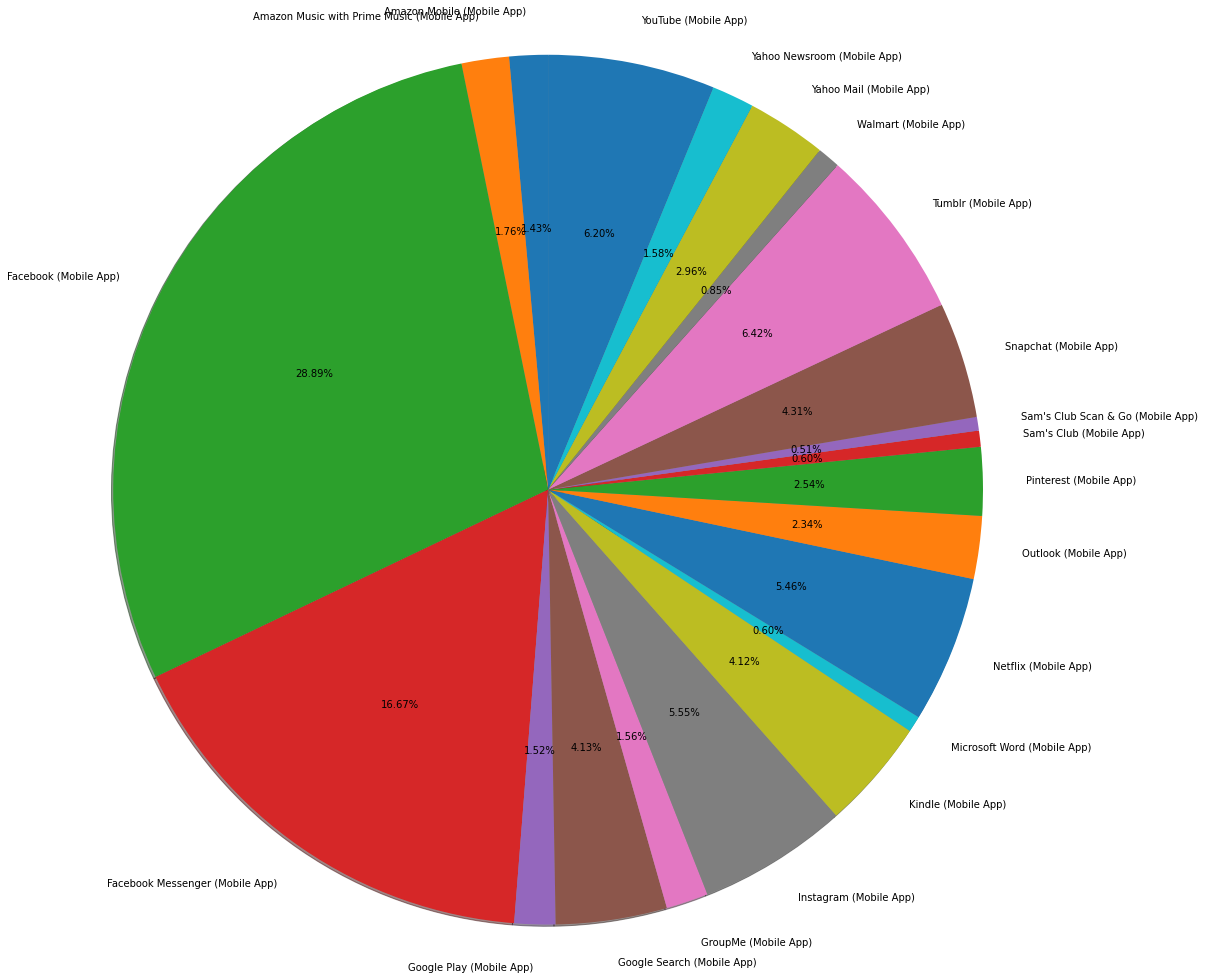

In [76]:
app_lst = list(app_names)
app_lst
plt.axis("equal")
plt.pie(avg_time_list, labels=app_lst, radius = 5, autopct = '%0.2f%%', shadow = True, startangle = 90)
plt.show()

In [77]:
users = res_dataset.groupby(['app_name','gender_id'])['device_id'].count()

In [78]:
app_lst = list(app_names)
app_lst

['Amazon Mobile (Mobile App)',
 'Amazon Music with Prime Music (Mobile App)',
 'Facebook (Mobile App)',
 'Facebook Messenger (Mobile App)',
 'Google Play (Mobile App)',
 'Google Search (Mobile App)',
 'GroupMe (Mobile App)',
 'Instagram (Mobile App)',
 'Kindle (Mobile App)',
 'Microsoft Word (Mobile App)',
 'Netflix (Mobile App)',
 'Outlook (Mobile App)',
 'Pinterest (Mobile App)',
 "Sam's Club (Mobile App)",
 "Sam's Club Scan & Go (Mobile App)",
 'Snapchat (Mobile App)',
 'Tumblr (Mobile App)',
 'Walmart (Mobile App)',
 'Yahoo Mail (Mobile App)',
 'Yahoo Newsroom (Mobile App)',
 'YouTube (Mobile App)']

In [79]:
df = pd.DataFrame(users)
df.reset_index(level=0, inplace=True)
df.reset_index(level=0, inplace=True)
df

,gender_id,app_name,device_id
0,1.0,Amazon Mobile (Mobile App),289
1,2.0,Amazon Mobile (Mobile App),541
2,1.0,Amazon Music with Prime Music (Mobile App),34
3,2.0,Amazon Music with Prime Music (Mobile App),92
4,1.0,Facebook (Mobile App),682
5,2.0,Facebook (Mobile App),1228
6,1.0,Facebook Messenger (Mobile App),652
7,2.0,Facebook Messenger (Mobile App),1260
8,1.0,Google Play (Mobile App),654
9,2.0,Google Play (Mobile App),1190


In [80]:
male_user_count = list(df[(df['gender_id']==1.0)]['device_id'])
male_user_count

[289,
 34,
 682,
 652,
 654,
 603,
 26,
 368,
 54,
 9,
 146,
 62,
 155,
 1,
 3,
 272,
 56,
 85,
 134,
 10,
 632]

In [81]:
female_user_count = list(df[(df['gender_id']==2.0)]['device_id'])
female_user_count

[541,
 92,
 1228,
 1260,
 1190,
 1144,
 66,
 724,
 75,
 27,
 287,
 149,
 379,
 1,
 4,
 552,
 94,
 218,
 262,
 35,
 1122]

In [82]:
xpos=np.arange(len(app_lst))
xpos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

# Plot to show users across Apps across gender

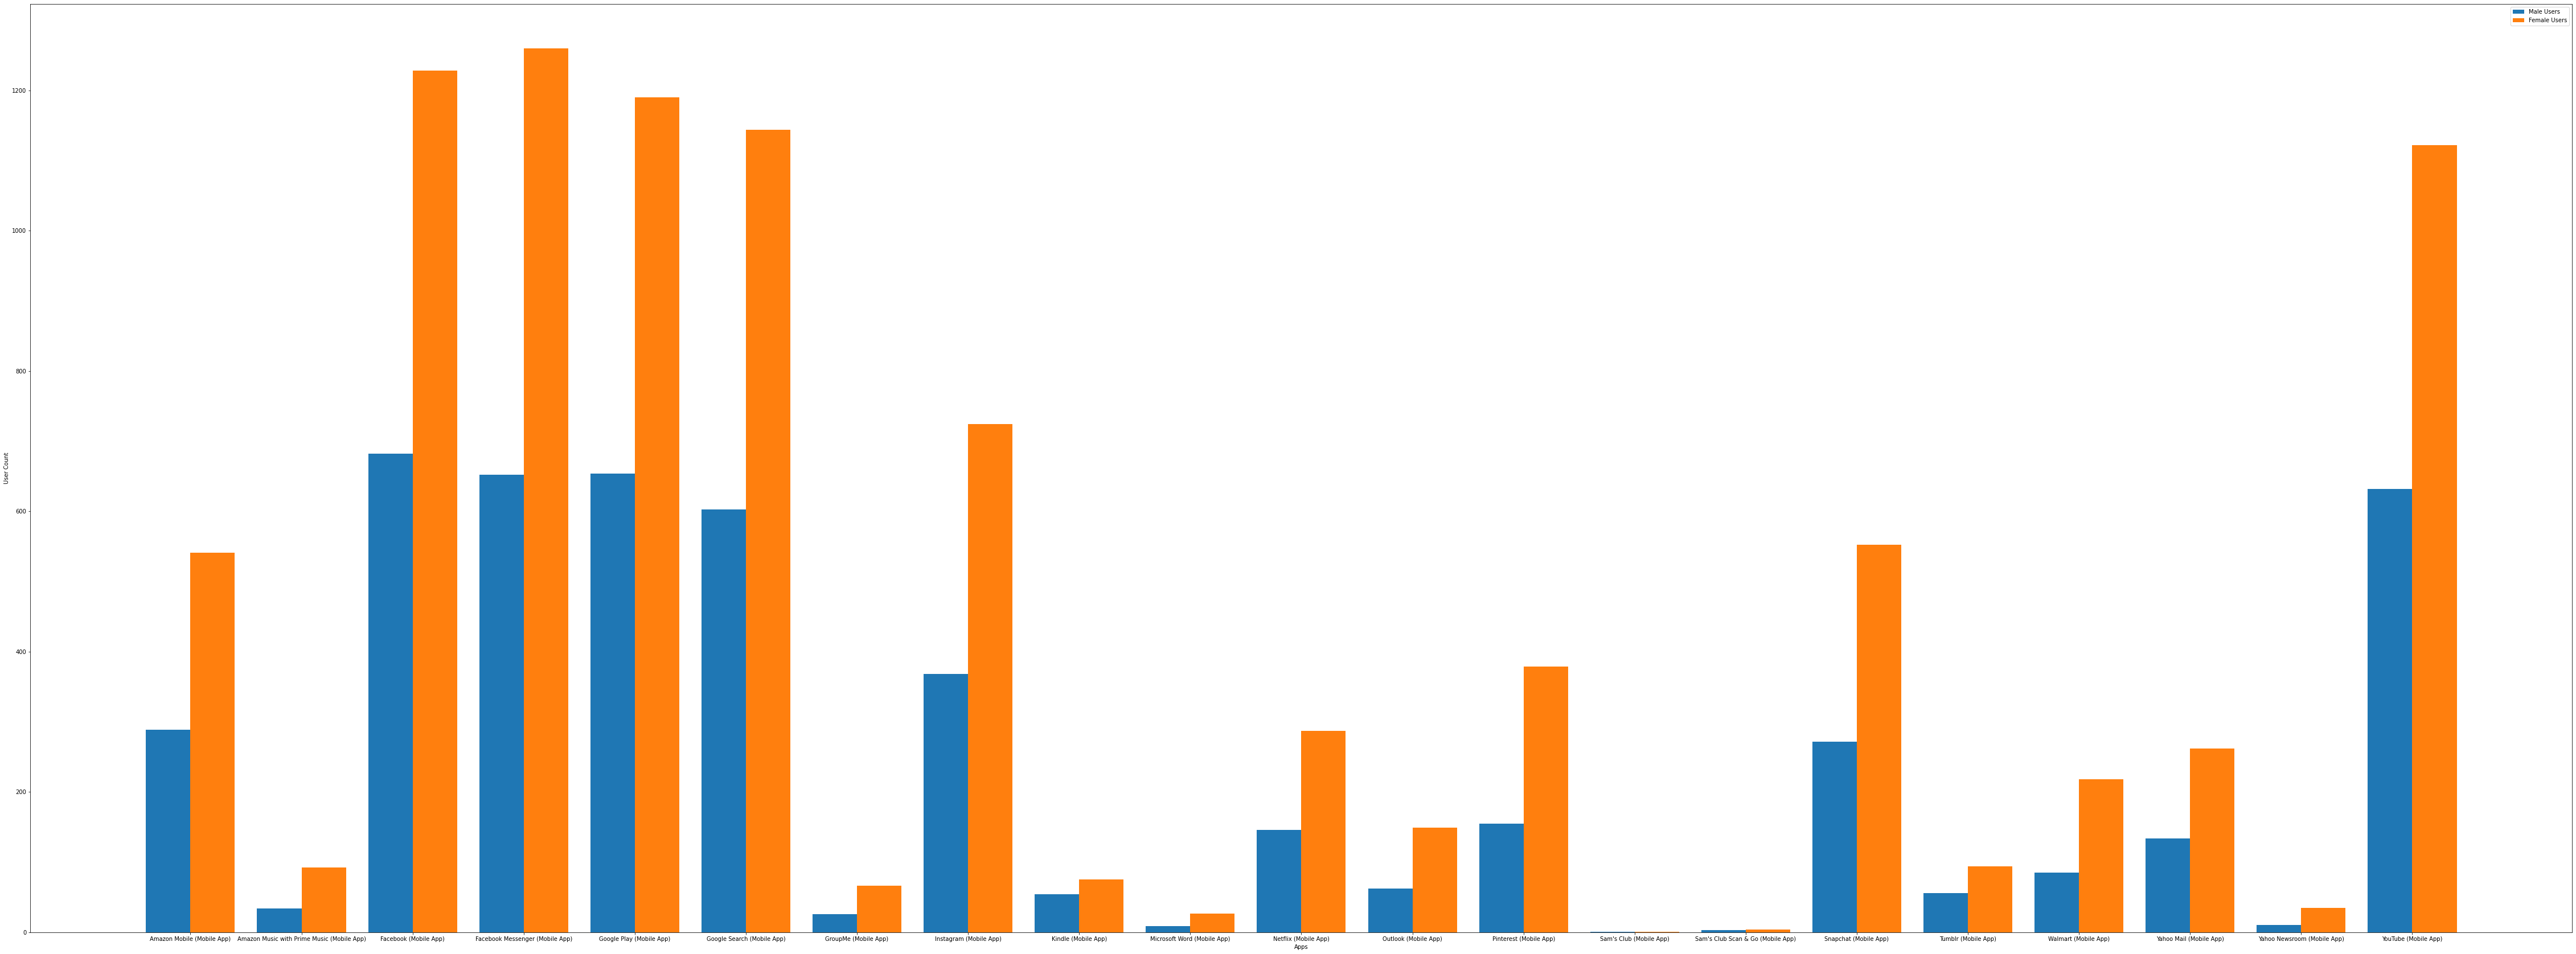

In [83]:
plt.figure(figsize=[80,30])
plt.xticks(xpos, app_lst)
plt.bar(xpos-0.2,male_user_count, width = 0.4, label="Male Users" )
plt.bar(xpos+0.2,female_user_count, width = 0.4, label="Female Users")
plt.ylabel('User Count')
plt.xlabel('Apps')
plt.legend()